# Proyecto 3  - Análisis de préstamos y modelos predictivos

2/12/2025

Profesor: Gabriel Alejandro Morales Ruiz

Integrantes:
- Pablo Josué Panécatl García
- Jesús Alejandro García García
- Paola Andrea Figueroa Álvarez

## 1. Objetivos
### General
Analizar el proceso de aprobación de préstamos mediante la construcción y evaluación de modelos predictivos basados en machine learning, incluyendo métodos sustentados en árboles de decisión, con el fin de identificar los factores más determinantes en la decisión crediticia y desarrollar herramientas analíticas capaces de estimar la probabilidad de aprobación de manera precisa y optimizada.

### Específicos
- Explorar, limpiar y preparar el conjunto de datos de solicitudes de préstamo, identificando patrones, valores faltantes y características relevantes para el modelado.
- Construir un modelo de Random Forest para la predicción de aprobación de préstamos, incorporando una semilla fija y un proceso de optimización de hiperparámetros.
- Desarrollar un modelo de XGBoost con semilla controlada y ajuste de hiperparámetros para maximizar la capacidad predictiva.
- Comparar el desempeño de ambos modelos mediante métricas de clasificación relevantes.
- Seleccionar el modelo con mejor desempeño y justificar su elección con base en las métricas obtenidas y el comportamiento del algoritmo.
- Interpretar los resultados obtenidos para identificar los factores que más influyen en la aprobación o rechazo de un préstamo.

# 2. Marco teórico
### Regresión lineal
Es una combinación lineal de factores independientes, es decir, que ninguno de los vectores puede expresarse como una combinación lineal de los demás, para poder aproximar. Su principal objetivo es buscar explicar la relación entre una variable dependiente y una o varias variables dependientes. En su ecuación original y= B0+B1X1+ BnXn + e, las betas son las incógnitas y la e representa el error, cuya suma no indica calidad, por lo que para esto se utiliza un coeficiente de determinación para, de esta manera, comparar modelos en base a que tanto de la varianza de salida corresponde a la varianza de entrada. 

#### 6 problemas potenciales en una regresión (ISLP)
Hay 6 posibles problemas a la hora de hacer una regresión lineal que podrían hacerla inválida:
   1. No linealidad en las relaciones respuesta-predictor:
    Cuando la relación real entre las variables no es lineal, el modelo no capta adecuadamente el comportamiento de los datos. Esto genera patrones sistemáticos en los residuos y sesgos en las predicciones.
  2. Correlación en los errores:
    Si los residuos están correlacionados, el modelo está omitiendo información relevante o patrones temporales. Esto lleva a predicciones menos confiables y a una subestimación de la variabilidad real.
  3. Heterocedasticidad en los errores
    Se presenta cuando la varianza del error no es constante en todos los niveles de los predictores. Esto significa que el modelo es menos confiable en ciertos rangos de datos, ya que predice la varianza de manera incorrecta.
  4. Datos atípicos
    Son observaciones que poseen valores inusuales en la variable dependiente. Los outliers pueden distorsionar las estimaciones de los coeficientes y reducir el r2, haciendo que el modelo parezca peor de lo que es.
  5. Puntos de alta palanca
    Un punto de alta palanca puede hacer que un solo puntito cambie drásticamente los betas de la regresión y no generalice apropiadamente para la mayoría de los datos
  6. Colinealidad
    Cuando dos o más puntos explican casi lo mismo para la variable predecida, los coeficientes se vuelven inestables ya que el modelo no sabe bien a cuál darle el crédito. 

### Árbol para regresión
Se usa para predecir valores continuos, donde se dividen los datos para que cada grupo final (hoja) tenga los valores más parecidos posibles. La predicción final es el promedio de los valores en ese grupo.

### Árbol para clasificación
Se usa para predecir categorías, dividendo los datos para que cada grupo final sea lo más "puro" posible (que contenga solo una categoría). Para medir esta pureza, se puede usar el Índice Gini, el cual mide la desigualdad en la distribución de los datos.

### Bootstrap
El Bootstrap es una técnica de remuestreo muy úti, permitiendo estimar la precisión y la estabilidad de una estadística (como la media o la mediana) sin tener que ir a buscar más datos de la población. Es un truco para saber qué tan confiable es nuestra muestra.

### Ensambles de modelos
Los ensambles son como pedir opinión a un comité en lugar de a una sola persona: se obtienen mejores resultados combinando predicciones de varios modelos.
####  Bagging
Bagging: Combina el proceso de Bootstrap con la agregación. Entrena muchos modelos en muchas muestras ligeramente diferentes y luego promedia o vota sus resultados. Esto reduce la varianza (hace el modelo menos sensible a cambios pequeños en los datos).
#### Boosting
Es un proceso secuencial de aprendizaje porque cada nuevo modelo se construye para corregir específicamente los errores y fallas del modelo anterior. Es una técnica muy poderosa para reducir el sesgo y enfocarse en los datos más difíciles. Por ejemplo, tenemos x2, el cual, es una combinación de x1 + sus errores; igual que en biología, vas a aprendiendo para "sobrevivir"

### Tema elegido para proyecto
El conjunto de datos “Finance Loan Approval Prediction Data” recopila información financiera, demográfica y de historial de crédito de solicitantes de préstamo, con el objetivo de predecir si su solicitud será aprobada o rechazada. Entre sus variables se encuentran el número de dependientes, nivel de educación, si el solicitante es auto-empleado, su ingreso anual, el monto del préstamo solicitado, el plazo del préstamo, su puntaje de crédito (CIBIL score), valores de activos residenciales, comerciales o de lujo, valor de activos bancarios, y finalmente la variable objetivo: el estatus del préstamo (aprobado o rechazado)

# 3. Análisis del dataset
### ¿De dónde viene?
Fue descargado de Kaggle, sin embargo, estos datos son una imitación (muy apegada a la reallidad) de datos bancarios. Este tipo de datasets son creados para hackathons por "Analytics Vidhya". 

### ¿Qué contiene?
Incluye información sobre el género, su estado civil, número de dependientes, nivel de educación, si son autoempleados, área de la propiedad que se quiere comprar, ingreso del solicitante y del co-solicitante, monto del préstamos solicitado y su plazo. Asimismo, incluye variables binarias como el historial crediticio (1 si tiene buen historial, 0 si no) y estatus del préstamo ('y' aprobado o 'N' rechazado).

### ¿Qué información dan las muestras?
Cada muestra representa una solicitud de préstamo individual, proporcionando el perfil completo del solicitante y el resultado final de si el préstamo fue aprobado o rechazado

### ¿Qué se quiere analizar?
El objetivo general es analizar el proceso de aprobación de préstamos mediante la construcción de modelos predictivos de machine learning (Random Forest y XGBoost) para estimar la probabilidad de aprobación e identificar los factores más determinantes en la decisión crediticia.

### ¿Qué resultado se podría encontrar al realizar una regresión?
El principal resultado esperado de los modelos es lograr la predicción más precisa posible, cuyo rendimiento se evaluará mediante el Área Bajo la Curva ROC (AUC). El segundo resultado fundamental es la identificación de los Factores Determinantes, lo que implica interpretar cuál de las variables de entrada tiene el mayor impacto e influencia en la decisión final de aprobación del préstamo.

## 4. Modelos propuestos
El análisis propone evaluar dos modelos de clasificación basados en ensambles de árboles con la finalidad de poder predecir el estatus de aprobación de préstamos:
 - Random Forest (RF, que utiliza bagging)
 - XGBoost (que emplea boosting)

Para garantizar resultados consistentes y reproducibles, ambos modelos se inicializan con una semilla fija de 42. Buscando maximizar su poder predictivo, se utiliza la Optimización Bayesiana (BayesSearchCV) para ajustar de manera sistemática sus hiperparámetros clave. Finalmente, la estabilidad y el rendimiento real de los modelos optimizados se validan mediante K-Fold Cross-Validation con K=10 folds, utilizando el Área Bajo la Curva ROC (AUC) como métrica principal para la comparación y selección del mejor clasificador. 

#### Justificación del métrico que seleccionamos
Se seleccionó el AUC como métrica de evaluación debido a la naturaleza del dataset. En nuestro dataset de préstamos, lo más común es que la mayoría de los créditos sean aprobados y pocos sean rechazados. Por esta razón nos parece pertinente utilizar AUC, ya que nos ayuda a evaluar con un balance. No usamos métricos como Accuracy, ya que a la hora de optimizar, si la mayoría de los préstamos se pagan, un modelo que simplemente diga "Aprobar todo" tendrá una exactitud alta (óptima), pero será inútil para el banco porque no se deberían aprobar préstamos a todas las personas. Por el contrario, el AUC evalúa la capacidad del modelo para distinguir correctamente entre ambas clases

## 5. Pipeline

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer 
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict

### 1. Carga de datos

In [2]:
df = pd.read_csv(r"/Users/paofigueroa/Documents/sem 5/Lab de aprendizaje estadístico/train.csv")

### 2. EDA

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isnull().sum()/len(df)

Loan_ID              0.000000
Gender               0.021173
Married              0.004886
Dependents           0.024430
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

Son tan poquitos nulos que sí los podemos tirar

### 3. Feature Engineering

In [6]:
df = df.dropna()
df = df.drop(columns = ['Loan_ID'])

In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000



La media de las variables es notablemente mayor que su mediana, lo que confirma una asimetría extrema (cola larga a la derecha) causada por posibles outliers. Es por eso que aplicaremos la transformación logarítmica para reducir este sesgo, estabilizar la varianza y asegurar que la distribución de las características sea más adecuada para el entrenamiento de los modelos .

### 4. Pipeline

In [ ]:
cols_to_log = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
for col in cols_to_log:
    df[col] = np.log1p(df[col])


Se utiliza LabelEncoder en la variable objetivo, Loan_Status, para convertir estas etiquetas de texto en valores numéricos binarios (0 y 1). Esto es un proceso que más adelante nos servirá porque los algoritmos de machine learning requieren que la variable de salida que intentan predecir esté en un formato numérico para poder realizar los cálculos de clasificación.

In [ ]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()

### 5. Creamos el modelo

Definimos el preprocesador y los diferentes pipelines para cada modelo: 
- Random Forest: tiene una robusta arquitectura de bagging que entrena múltiples árboles de forma independiente
- XGBoost: los árboles se construyen de manera secuencial para corregir los errores del modelo anterior, siendo una técnica extremadamente potente para reducir el sesgo y maximizar el poder predictivo.
- OneHotEncoder: transforma las variables categóricas en múltiples columnas binarias, permitiendo que los algoritmos de ensamble puedan procesar esta información para construir sus reglas de división.

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(eval_metric='logloss', random_state=42, use_label_encoder=False))
])

Y para cada modelo les definimos los rangos en los cuales optimizar

In [ ]:
search_space_rf = {
    'classifier__n_estimators': Integer(100, 500),         # De 100 a 500 árboles
    'classifier__max_depth': Integer(5, 50),               # Profundidad
    'classifier__min_samples_split': Integer(2, 20),
    'classifier__min_samples_leaf': Integer(1, 10),
    'classifier__bootstrap': Categorical([True, False])    # Categoría
}

search_space_xgb = {
    'classifier__n_estimators': Integer(100, 500),
    'classifier__learning_rate': Real(0.01, 0.3, prior='log-uniform'), # Explora escalas logarítmicas
    'classifier__max_depth': Integer(3, 10),
    'classifier__subsample': Real(0.5, 1.0),
    'classifier__colsample_bytree': Real(0.5, 1.0)
}

In [ ]:
bayes_rf = BayesSearchCV(
    rf_pipeline, 
    search_space_rf, 
    n_iter=10, 
    cv=10, 
    scoring='roc_auc', 
    n_jobs=-1, 
    random_state=42
)
bayes_rf.fit(X, y)
best_rf = bayes_rf.best_estimator_
print(f"Mejor RF AUC: {bayes_rf.best_score_:.4f}")
print(f"Mejores Params RF: {bayes_rf.best_params_}")


bayes_xgb = BayesSearchCV(
    xgb_pipeline, 
    search_space_xgb, 
    n_iter=10, 
    cv=10, 
    scoring='roc_auc', 
    n_jobs=-1, 
    random_state=42
)
bayes_xgb.fit(X, y)
best_xgb = bayes_xgb.best_estimator_
print(f"Mejor XGB AUC: {bayes_xgb.best_score_:.4f}")
print(f"Mejores Params XGB: {bayes_xgb.best_params_}")

Mejor RF AUC: 0.7679
Mejores Params RF: OrderedDict({'classifier__bootstrap': True, 'classifier__max_depth': 46, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 175})


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [13:50:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [13:50:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [13:50:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [13:50:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

Mejor XGB AUC: 0.7600
Mejores Params XGB: OrderedDict({'classifier__colsample_bytree': 0.9061979941786817, 'classifier__learning_rate': 0.01794217698903441, 'classifier__max_depth': 7, 'classifier__n_estimators': 421, 'classifier__subsample': 0.7615261640271918})


In [ ]:
models = {
    "Random Forest (Bayes)": best_rf,
    "XGBoost (Bayes)": best_xgb
}

results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=10, scoring='roc_auc')
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    results[name] = mean_score
    print(f"{name}: Media AUC = {mean_score:.4f} (+/- {std_score:.4f})")

ganador = max(results, key=results.get)

Random Forest (Bayes): Media AUC = 0.7679 (+/- 0.0551)
XGBoost (Bayes): Media AUC = 0.7600 (+/- 0.0624)


El mejor modelo es el Random Forest  porque obtuvo una media del Área Bajo la Curva ROC (AUC) ligeramente superior en comparación con el XGBoost. Adicionalmente, el Random Forest demostró ser más estable, como lo indica su menor desviación estándar  en los 10 folds de validación cruzada, lo que sugiere un rendimiento más consistente y confiable para la predicción.

### 6. Visualizaciones

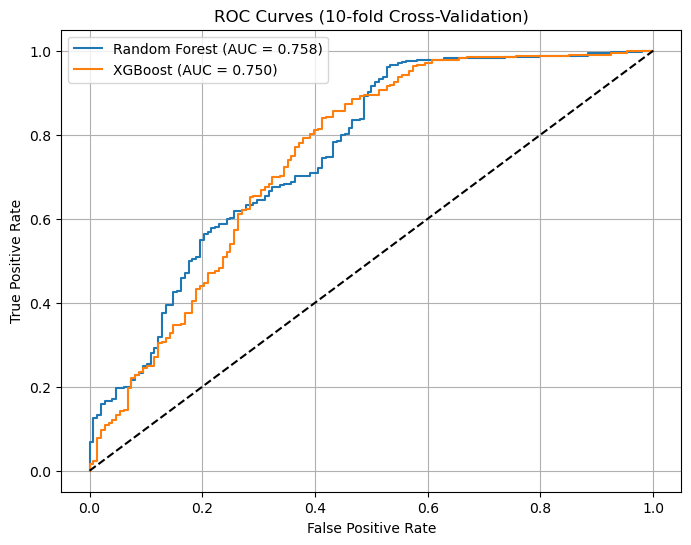

In [ ]:

rf_probs = cross_val_predict(best_rf, X, y, cv=10, method='predict_proba')[:, 1]
xgb_probs = cross_val_predict(best_xgb, X, y, cv=10, method='predict_proba')[:, 1]

# === Curvas ROC ===
rf_fpr, rf_tpr, _ = roc_curve(y, rf_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y, xgb_probs)

rf_auc = auc(rf_fpr, rf_tpr)
xgb_auc = auc(xgb_fpr, xgb_tpr)

# === Plot ROC ===
plt.figure(figsize=(8,6))
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.3f})")
plt.plot(xgb_fpr, xgb_tpr, label=f"XGBoost (AUC = {xgb_auc:.3f})")
plt.plot([0,1], [0,1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (10-fold Cross-Validation)")
plt.legend()
plt.grid(True)
plt.show()


La curva Random Forest se posiciona consistentemente por encima de la curva XGBoost a lo largo de la gráfica, lo cual indica que el modelo Random Forest tiene un mejor desempeño general en la tarea de clasificación. El valor de AUC de 0.758 para Random Forest, confirma que es el clasificador superior y que tiene una probabilidad del 75.8% de distinguir correctamente entre una solicitud de préstamo aprobada y una rechazada. Por el contrario, la curva de XGBoost muestra un rendimiento ligeramente inferior y, dado que ambas curvas se encuentran significativamente alejadas de la línea diagonal punteada (que representa un clasificador aleatorio), ambos modelos son considerados buenos para esta tarea predictiva.

*Nota: La diferencia entre los numeros de la media se debe a que la "Media AUC" (0.7679) que aparece en el código es el promedio de 10 valores de AUC calculados separadamente para cada uno de los 10 folds (o "piezas" de información nueva). En contraste, el AUC de la visualización (0.758) se calcula tomando todas las predicciones de esos 10 folds juntas y calculando un solo valor de AUC sobre todo el conjunto de dato

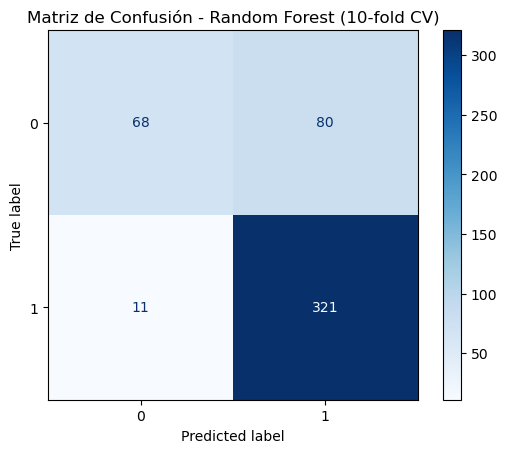

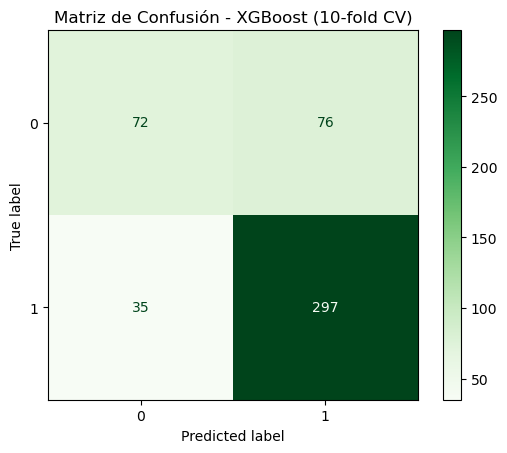

In [23]:
# matriz de confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

rf_pred = cross_val_predict(best_rf, X, y, cv=10)
xgb_pred = cross_val_predict(best_xgb, X, y, cv=10)

# matriz de random forest
cm_rf = confusion_matrix(y, rf_pred)
disp_rf = ConfusionMatrixDisplay(cm_rf)
disp_rf.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusión - Random Forest (10-fold CV)")
plt.show()

# Matriz de xgboost
cm_xgb = confusion_matrix(y, xgb_pred)
disp_xgb = ConfusionMatrixDisplay(cm_xgb)
disp_xgb.plot(cmap="Greens", values_format="d")
plt.title("Matriz de Confusión - XGBoost (10-fold CV)")
plt.show()


La matriz azul de RF muestra que se identificaron correctamente a 321 solicitantes como aprobados (Verdaderos Positivos), fallando en aprobar solo a 11 solicitantes que sí debían serlo (Falsos Negativos). Sin embargo, su debilidad reside en la clasificación de los préstamos rechazados (Clase 0): mientras que solo 68 solicitudes fueron correctamente identificadas como rechazadas (Verdaderos Negativos), el modelo incorrectamente rechazó a 80 solicitantes que, según los datos, debieron ser aprobados (Falsos Positivos). Esto implica que, aunque es muy bueno para aprobar a quienes sí lo merecen, el modelo tiende a ser demasiado optimista en sus predicciones.
La matriz de XGBoost (verde) revela un patrón de error distinto: es más conservador al aprobar. En este caso, el modelo solo aprobó correctamente a 297 solicitantes (Verdaderos Positivos), cometiendo un error significativo al rechazar a 35 solicitantes que en realidad sí cumplían con los criterios (Falsos Negativos). No obstante, XGBoost fue ligeramente más preciso al predecir los rechazos (Clase 0), identificando correctamente a 72 casos (Verdaderos Negativos) y equivocándose solo en 76 rechazos incorrectos (Falsos Positivos). Esto lo hace un modelo más prudente, con un mayor riesgo de Falsos Negativos, lo que significaría dejar de ganar un buen cliente.

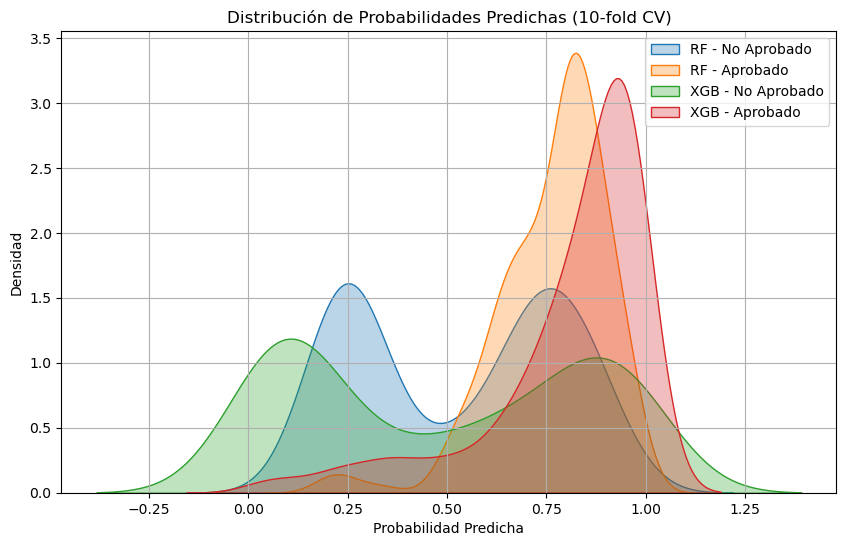

In [24]:
# Distribución de probabilidades por clase

rf_probs = cross_val_predict(best_rf, X, y, cv=10, method='predict_proba')[:, 1]
xgb_probs = cross_val_predict(best_xgb, X, y, cv=10, method='predict_proba')[:, 1]

# Gráfica
plt.figure(figsize=(10,6))

sns.kdeplot(rf_probs[y == 0], label="RF - No Aprobado", fill=True, alpha=0.3)
sns.kdeplot(rf_probs[y == 1], label="RF - Aprobado", fill=True, alpha=0.3)

sns.kdeplot(xgb_probs[y == 0], label="XGB - No Aprobado", fill=True, alpha=0.3)
sns.kdeplot(xgb_probs[y == 1], label="XGB - Aprobado", fill=True, alpha=0.3)

plt.title("Distribución de Probabilidades Predichas (10-fold CV)")
plt.xlabel("Probabilidad Predicha")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.show()


La distribución de probabilidades predichas ofrece una visión detallada de cómo cada modelo separa las clases.
 La zona donde las curvas de “Aprobado” y “No Aprobado” se superponen, aproximadamente entre 0.45 y 0.75, representa el intervalo de mayor incertidumbre, es decir, donde ambos modelos tienen más dificultad para distinguir correctamente las solicitudes.

El modelo XGBoost (curvas rojas y verdes) muestra una distribución de probabilidades más concentrada, especialmente para la clase “Aprobado”, con un pico pronunciado cercano a 1.0. Esto indica que cuando XGBoost decide aprobar un crédito, lo hace con un nivel de confianza muy alto y con menor dispersión en sus predicciones. En otras palabras, sus aprobaciones tienden a ser más “decididas”.

Por otro lado, Random Forest (curvas azul y naranja) presenta una separación más uniforme entre clases a lo largo de todo el rango de probabilidades. Aunque no concentra tanto las predicciones de la clase positiva, mantiene una mejor capacidad global de clasificación. Esto se refleja en su AUC superior.
Con esto, podemos afirmar que  XGBoost es más “segmentado” y hace predicciones positivas más extremas y seguras. Por el otro lado, Random Forest es más “equilibrado” y exhibe una capacidad discriminativa más robusta en general. Esto explica por qué, aun cuando XGBoost parece más contundente en los casos claros de aprobación, es Random Forest el que domina globalmente según las métricas de desempeño.

### 7. Conclusiones

El proyecto cumplió con éxito su objetivo de construir y evaluar modelos predictivos para el proceso de aprobación de préstamos, apoyándose en un preprocesamiento cuidadoso que incluyó la transformación logarítmica de variables sesgadas y la codificación adecuada de los atributos categóricos. Más allá de los resultados cuantitativos, este ejercicio evidenció la importancia de entender profundamente los conceptos estadísticos y de tratar adecuadamente a los datos. A partir de las métricas y de las distribuciones de probabilidad, se comprobó que Random Forest ofrece la capacidad discriminativa más estable y robusta en todos los umbrales de decisión, mientras que XGBoost destaca por emitir aprobaciones con mayor certidumbre cuando decide clasificar positivamente. Es por esto que podemos concluir que Random Forest exhibe una capacidad discriminativa más robusta y global a través de todos los umbrales de decisión, consolidándose como la herramienta más confiable para estimar la probabilidad de aprobación de un préstamo e identificar los factores de riesgo clave. En conjunto, estos hallazgos permitieron no solo identificar al modelo más confiable para estimar la probabilidad de aprobación y detectar factores de riesgo, sino también reconocer que un buen desempeño predictivo es inseparable de un proceso analítico bien fundamentado y de una comprensión clara de las herramientas empleadas.

## Bibliografías

- M. López, “Métodos de bagging y de boosting: ¿Cuál es su diferencia?,” IMMUNE Technology Institute, Dec. 10, 2021. https://immune.institute/blog/metodos-de-bagging-y-de-boosting-diferencia/
- James, G., Witten, D., Hastie, T., Tibshirani, R., & Taylor, J. (2023). An introduction to statistical learning: with applications in Python. Springer.
- Kavlakoglu, E., & Russi, E. (s. f.). ¿Qué es XGBoost? IBM. https://www.ibm.com/mx-es/think/topics/xgboost


